# 1.Training Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [8]:
df = pd.read_csv('loan-train.csv')

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

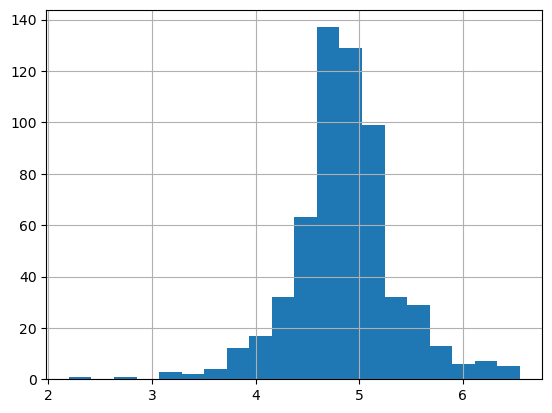

In [12]:
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

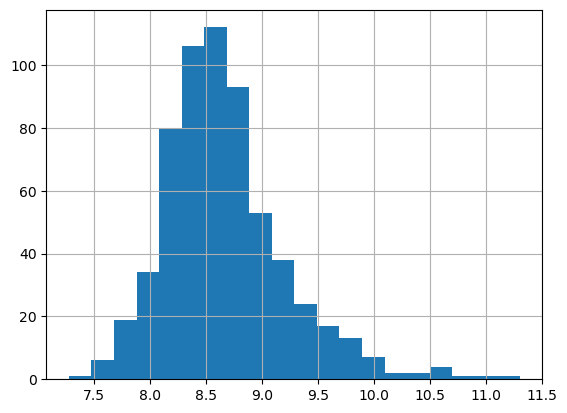

In [14]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

df.LoanAmount =df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log =df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [37]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'Yes', '0', ..., 1.0, 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., 1.0, 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., 1.0, 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 1.0, 5243, 8.564649132572534],
       ['Male', 'Yes', '0', ..., 1.0, 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., 1.0, 9200, 9.126958763037132]],
      dtype=object)

In [40]:
y

array([4.70048037, 4.83628191, 5.33753808, 4.60517019, 4.35670883,
       5.02388052, 4.07753744, 4.99043259, 5.6347896 , 4.81218436,
       4.49980967, 5.08759634, 3.68887945, 5.11198779, 4.82028157,
       4.87519732, 5.29831737, 4.83628191, 5.70378247, 4.60517019,
       3.87120101, 3.33220451, 4.61512052, 4.82831374, 5.66988092,
       4.99721227, 4.94164242, 5.6167711 , 4.04305127, 4.82831374,
       4.31748811, 5.25749537, 5.02388052, 5.06259503, 4.61512052,
       5.170484  , 5.22035583, 4.49980967, 4.75359019, 4.92725369,
       4.60517019, 4.70048037, 4.49980967, 5.29831737, 4.4308168 ,
       5.22035583, 5.08759634, 4.68213123, 5.23110862, 5.23110862,
       4.82028157, 4.78749174, 5.07517382, 3.40119738, 4.52178858,
       4.86753445, 4.86753445, 4.8978398 , 5.170484  , 4.49980967,
       4.70048037, 4.82831374, 5.24174702, 4.68213123, 4.82831374,
       4.92725369, 4.90527478, 4.86753445, 5.23110862, 5.23644196,
       4.55387689, 4.17438727, 4.93447393, 5.44673737, 4.96981

In [43]:
print("per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


numbers of pepole who take loan as group by gender:
Gender
Male      297
Female     70
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

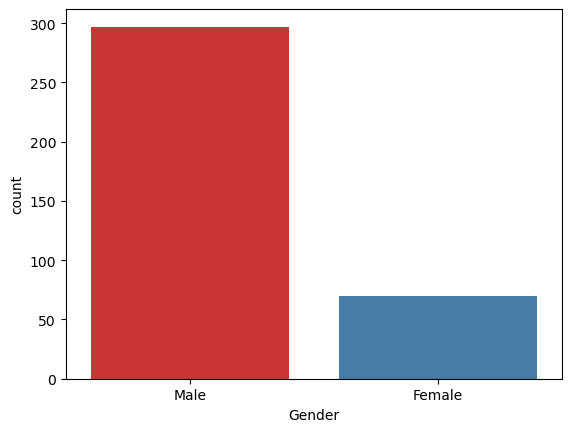

In [45]:
print("numbers of pepole who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data = df, palette ='Set1')

numbers of pepole who take loan as group by marital status:
Married
Yes    233
No     134
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

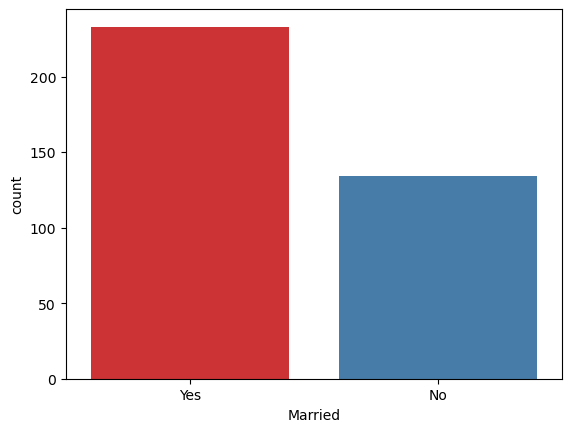

In [46]:
print("numbers of pepole who take loan as group by marital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data = df, palette ='Set1')

numbers of pepole who take loan as group by dependents:
Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

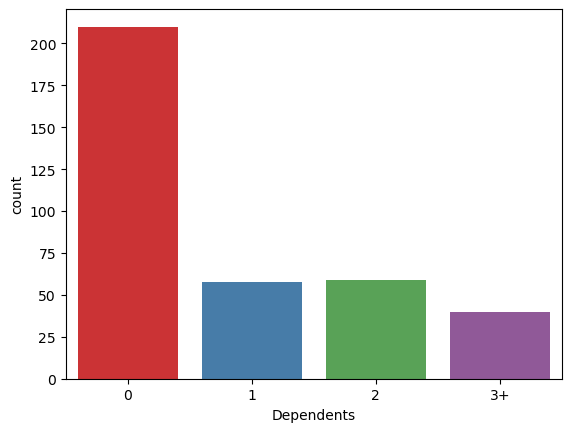

In [47]:
print("numbers of pepole who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data = df, palette ='Set1')

numbers of pepole who take loan as group by self employed:
Self_Employed
No     330
Yes     37
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

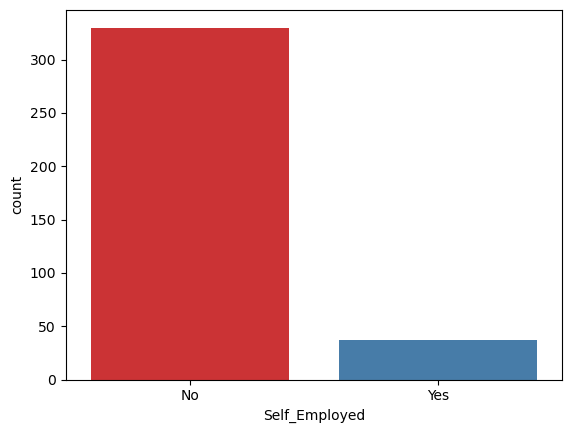

In [49]:
print("numbers of pepole who take loan as group by self employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data = df, palette ='Set1')

numbers of pepole who take loan as group by LoanAmount:
LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
225.0     1
71.0      1
213.0     1
157.0     1
98.0      1
Name: count, Length: 145, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

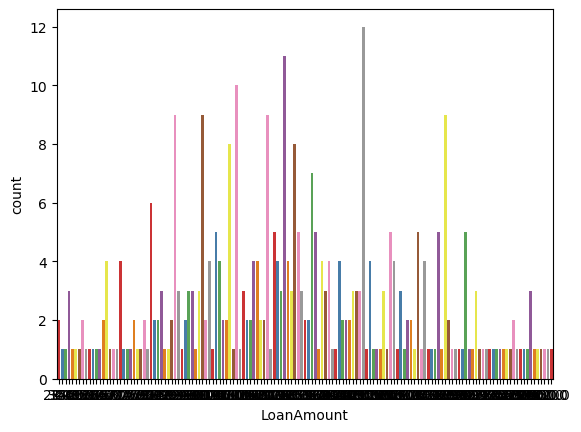

In [51]:
print("numbers of pepole who take loan as group by LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data = df, palette ='Set1')

numbers of pepole who take loan as group by Credit History  :
Credit_History
1.0    308
0.0     59
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

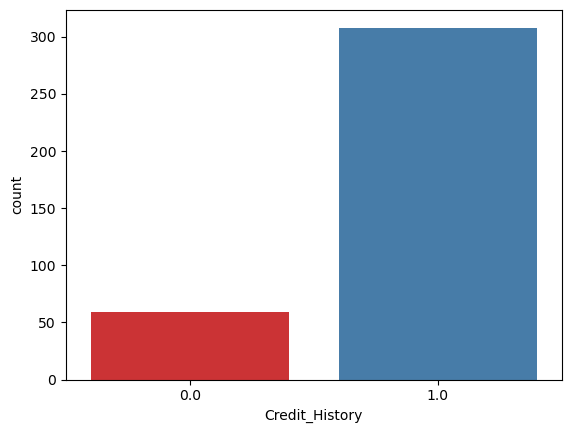

In [52]:
print("numbers of pepole who take loan as group by Credit History  :")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data = df, palette ='Set1')

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state =0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [59]:
for i in range(0,5):
    x_train[:,i] = Labelencoder_x.fit_transform(x_train[:,i])
    x_train[:,7] = Labelencoder_x.fit_transform(x_train[:,7])

In [60]:
x_train

array([[0, 0, 0, ..., 0.0, 3601, 41],
       [1, 1, 0, ..., 0.0, 5404, 148],
       [1, 1, 2, ..., 1.0, 7500, 219],
       ...,
       [1, 1, 1, ..., 0.0, 4416, 88],
       [1, 0, 0, ..., 1.0, 4258, 79],
       [1, 1, 0, ..., 1.0, 5225, 139]], dtype=object)

In [62]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

print(y_train)

[ 44  41  99  12  83  40   0 120  28 101  50 101  66  20  35  62  60  37
  22  61  44  80  97  69  24   3  88 101  44  89  62 110  83  61  40 110
   6  26  40 130   5 101  17  97  16 127  62  52 122  47  60  61  14  57
  28 116  58  88 120  37  34  73  38  83  80  51  18  83  31  73  90  33
  92 114  55  69  69  69  61  46  10  52  81 121  71  65 112  64  46  66
  77  83  65  96  64  53  29  52  25   8  13  36  30  55  75 101 125  84
 100  22  11  64  56  45  49 109  35  25 119 126  62  40 125  38  23  44
  83  67  81 107  43  86  92  24  58  55  39  33  20 118  59  61  64  55
 129  15  85  57 105  57  36  38  93  55  38  96  36   3  55 123  17   6
   0  60  83  27  31  67  36  40 117  46  28  91  55 108  90  43 110  69
  28 100  70  96  46  59  36  83  42  61 101  22 103  44  59 115  61 107
  46  28  90   9  76  29  58  78  46  55  21 102 101  79 100  36  72 131
  89  66  32  88  36  44  65  79  82   2 128  82  52 111  78  68  89  48
  28 107  64  98  51   1  92  13  94   7  95  11  4

In [63]:
for i in range(0,5):
    x_test[:,i] = Labelencoder_x.fit_transform(x_test[:,i])
    x_test[:,7] = Labelencoder_x.fit_transform(x_test[:,7])

In [65]:
print(x_test)

[[1 0 0 0 2 0.0 3356 10]
 [0 0 1 0 2 1.0 6433 57]
 [1 1 0 0 2 1.0 8160 68]
 [1 1 2 0 2 1.0 5613 47]
 [1 1 1 0 2 1.0 7466 62]
 [1 0 0 1 2 1.0 2868 6]
 [1 1 0 0 2 1.0 5474 43]
 [0 0 3 0 2 0.0 7638 65]
 [1 0 0 0 3 1.0 4333 25]
 [0 0 1 1 2 1.0 2226 0]
 [1 0 0 0 2 1.0 3125 7]
 [1 1 3 0 1 1.0 6088 54]
 [1 1 1 0 2 1.0 18840 73]
 [1 1 0 1 2 1.0 4887 34]
 [1 1 2 0 2 1.0 4120 20]
 [0 0 0 0 2 1.0 2362 2]
 [1 1 1 1 2 1.0 4357 26]
 [0 1 0 0 3 0.0 2262 1]
 [1 1 0 1 2 1.0 5668 49]
 [1 0 0 0 2 0.0 4727 32]
 [1 1 3 1 2 0.0 7322 61]
 [1 1 0 0 2 1.0 3342 9]
 [1 1 3 0 0 1.0 4720 31]
 [0 1 0 0 2 0.0 4241 22]
 [0 0 0 0 2 1.0 14987 72]
 [0 1 1 0 2 1.0 5304 40]
 [1 1 0 0 2 1.0 7666 66]
 [0 1 1 1 2 1.0 6338 56]
 [0 1 2 0 2 1.0 6318 55]
 [1 0 0 0 2 1.0 4083 18]
 [0 0 0 0 2 0.0 12500 71]
 [1 1 1 0 2 1.0 3901 15]
 [1 0 1 0 2 1.0 5667 48]
 [1 1 0 0 2 1.0 5059 38]
 [1 1 0 1 2 1.0 5293 39]
 [1 1 0 1 2 1.0 5587 46]
 [1 1 0 1 2 1.0 4136 21]
 [1 1 1 0 2 1.0 4860 33]
 [1 1 2 0 2 1.0 4115 19]
 [1 1 3 1 2 1.0 4490 29]
 [1

In [67]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([22,  8, 47, 32, 24,  6, 27, 39,  4,  2,  3, 15, 51, 32, 26,  1, 26,
       24, 36, 37, 31, 10, 11, 10, 44, 19, 49, 42, 23, 13, 52, 20, 28, 11,
       12, 38, 18, 16, 46, 25, 49,  5, 37, 42,  0, 45, 37, 21, 16, 30, 40,
       17, 43,  7, 47, 27, 41, 25, 50, 48, 23, 14, 35, 28, 37,  7, 27, 29,
       25, 33, 34, 18, 41,  9], dtype=int64)

In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
from sklearn import metrics

y_pred = rf_clf.predict(x_test)
print("accurecy of random forest clf is", metrics.accuracy_score(y_pred, y_test))

y_pred

accurecy of random forest clf is 0.013513513513513514


array([ 58,  29, 121,  78,  60,  28,  46, 101,  46,  10,  66,  68, 131,
        90,  46,  11,  64,  31,  92,  14,  93,   2,   1,  40,  83,  46,
       123,  52,  95,  35,  81,  90,   6,  94,  90,  92,  50,  40,  46,
        55,  60,  18,  78,  48,  43,  28,  85,  60,  28,  89,  32,  30,
        14,  61, 124,  96, 124,  30,  69,  45,  18,  52,  55,  55,  83,
        55,  61,  55,  90,  60,  60,  32,  60,  11], dtype=int64)

In [73]:
# another classification method naive bayes
from sklearn.naive_bayes import GaussianNB
nb_clf =  GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [76]:
y_pred = nb_clf.predict(x_test)
print("accuracy of naive bayes is %.", metrics.accuracy_score(y_pred, y_test))

accuracy of naive bayes is %. 0.0


In [75]:
y_pred

array([61, 44, 83, 83, 83, 44, 83, 83, 46, 44, 44, 83, 83, 61, 22, 44, 61,
       61, 83, 61, 83, 44, 22, 65, 83, 44, 83, 83, 83, 44, 83, 22, 44, 46,
       61, 83, 61, 46, 22, 46, 83, 44, 83, 83, 22, 22, 44, 83, 61, 83, 65,
       46, 61, 83, 83, 44, 83, 46, 44, 83, 44, 22, 22, 46, 83, 46, 44, 46,
       83, 83, 83, 44, 83, 22], dtype=int64)

In [77]:
# another classification method DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred = dt_clf.predict(x_test)
print("accuracy of decision tree is :", metrics.accuracy_score(y_pred, y_test))

accuracy of decision tree is : 0.0


In [81]:
y_pred

array([ 25,  29, 121,  64, 124,  22,  46,  87,  59,  97,  32,  68, 131,
        13,  90,  16,  82,   8,  77,  85,  83,  33,  36,  29,  83,  46,
       123,  88,  88,  35,  81,  90,  36,  28,  90,  92,  10,  55,  90,
        55, 124,  22,  90,  48,  22,  22,  77,  55,  24, 118,  68,  59,
        32,  71, 112,  25, 112,  54,  62, 114,  22,  98,  56,  57,  97,
        15,  44,  62,  88, 121,  60,  32, 129,  16], dtype=int64)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred = kn_clf.predict(x_test)
print("accuracy of Kneighbors is  :", metrics.accuracy_score(y_pred, y_test))

accuracy of Kneighbors is  : 0.013513513513513514
